In [7]:
#########################################
# Test functions and non-permanant code #
# Author: Jarrett Reimers               #
# Keep as a reference, do not edit      #
#########################################

import pandas as pd
import os
import datetime

from query import Query
from stations import Stations

from matplotlib import pyplot

In [2]:
data = pd.read_csv("data/2015/5/1.csv")

starttimes = []
for starttime in data['starttime']:
  starttimes.append(datetime.datetime.strptime(starttime, "%m/%d/%Y %H:%M:%S"))
data['starttime'] = starttimes

data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,415,2015-05-01 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1
1,1523,2015-05-01 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0
2,642,2015-05-01 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1
3,367,2015-05-01 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1
4,2734,2015-05-01 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2


In [20]:
query = Query()
start_time = query.get_datetime(2015, 5, 1, 0, 0, 0)
end_time = query.get_datetime(2015, 5, 2, 0, 0, 0)
one_day = query.select_time(data, start_time, end_time)


In [21]:
stations = Stations()
stations.add_data(one_day)

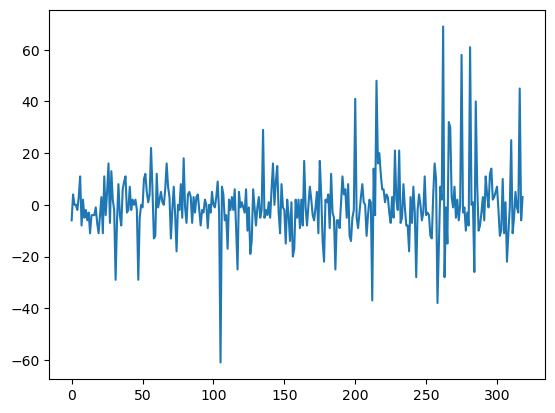

In [22]:
pyplot.plot(range(len(stations.stations_count)), stations.stations_count.values())

In [24]:
maximum = 0
max_station = 0
for station in stations.stations_count:
  if stations.stations_count[station] > maximum:
    max_station = station
    maximum = stations.stations_count[station]
print("The maximum is at station:", max_station, ". With", maximum, "bikes at end of period")

The maximum is at station: 496 . With 69 bikes at end of period


In [25]:
minimum = 0
min_station = 0
for station in stations.stations_count:
  if stations.stations_count[station] < minimum:
    min_station = station
    minimum = stations.stations_count[station]
print("The minimum is at station:", min_station, ". With", minimum, "bikes at end of period")

The minimum is at station: 324 . With -61 bikes at end of period
